# Fraud Data

In [1]:
!pip install imblearn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,roc_curve
import plotly.graph_objects as go
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold, cross_val_score


In [3]:
df = pd.read_csv("C:\\Users\\HP\\Desktop\\ExcelR Assignment\\Excelr DS\\Decision Tree\\Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df.shape

(600, 6)

In [6]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [7]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [9]:
col_names = ['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban']


for col in col_names:
    
    print(df[col].value_counts())  

YES    312
NO     288
Name: Undergrad, dtype: int64
Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64
59689    2
68833    1
60822    1
93090    1
79373    1
        ..
61906    1
31088    1
70365    1
56536    1
96519    1
Name: Taxable.Income, Length: 599, dtype: int64
57194     2
162777    2
50047     1
130912    1
64070     1
         ..
145744    1
58225     1
28661     1
117260    1
158137    1
Name: City.Population, Length: 598, dtype: int64
10    31
13    28
30    25
28    25
12    25
14    24
11    23
21    23
5     22
27    22
26    22
7     21
29    21
19    21
16    19
6     19
25    19
2     19
17    18
15    18
24    17
23    16
20    15
0     14
1     14
8     14
3     14
4     14
22    13
9     13
18    11
Name: Work.Experience, dtype: int64
YES    302
NO     298
Name: Urban, dtype: int64


In [10]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

# Correlation Matrix

In [11]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<AxesSubplot:>

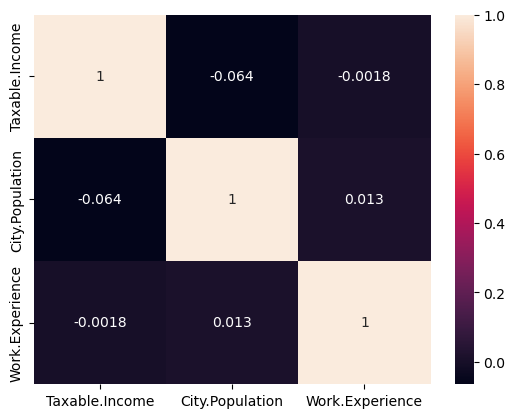

In [12]:
sns.heatmap(df.corr(),annot = True)

# Encoding the categorical data

In [13]:
df['Undergrad'] = df['Undergrad'].map({'YES':1,'NO':0})

In [14]:
df['Marital.Status'] = df['Marital.Status'].map({'Single':1,'Divorced':2,'Married':3})

In [15]:
df['Urban'] = df['Urban'].map({'YES':1,'NO':0})

In [16]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,1,68833,50047,10,1
1,1,2,33700,134075,18,1
2,0,3,36925,160205,30,1
3,1,1,50190,193264,15,1
4,0,3,81002,27533,28,0
...,...,...,...,...,...,...
595,1,2,76340,39492,7,1
596,1,2,69967,55369,2,1
597,0,2,47334,154058,0,1
598,1,3,98592,180083,17,0


In [17]:
df.sort_values(by = 'Taxable.Income')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
233,0,3,10003,63701,19,1
68,0,1,10150,139642,5,0
36,1,3,10163,193995,5,1
79,0,2,10329,140885,7,1
94,0,1,10348,122705,6,1
...,...,...,...,...,...,...
516,1,1,99239,76337,18,1
209,1,1,99307,186239,25,1
422,0,2,99311,191983,14,1
91,1,3,99325,73733,10,1


In [18]:
df['Tax_c'] = pd.cut(df['Taxable.Income'], bins = [0,30000,1000000],labels = ['Risky','Good'])

In [19]:
df['Tax_c'].value_counts()

Good     476
Risky    124
Name: Tax_c, dtype: int64

In [20]:
df['Tax_c'] = df['Tax_c'].map({'Risky':0,'Good':1})

In [21]:
df['Tax_c'].value_counts()

1    476
0    124
Name: Tax_c, dtype: int64

In [22]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_c
0,0,1,68833,50047,10,1,1
1,1,2,33700,134075,18,1,1
2,0,3,36925,160205,30,1,1
3,1,1,50190,193264,15,1,1
4,0,3,81002,27533,28,0,1
...,...,...,...,...,...,...,...
595,1,2,76340,39492,7,1,1
596,1,2,69967,55369,2,1,1
597,0,2,47334,154058,0,1,1
598,1,3,98592,180083,17,0,1


# Scaling the data

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1 = pd.DataFrame(scaler.fit_transform(df),
                  columns=df.columns,
                  index = df.index)

In [24]:
df1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_c
0,0.0,0.0,0.656468,0.139472,0.333333,1.0,1.0
1,1.0,0.5,0.264428,0.622394,0.600000,1.0,1.0
2,0.0,1.0,0.300415,0.772568,1.000000,1.0,1.0
3,1.0,0.0,0.448436,0.962563,0.500000,1.0,1.0
4,0.0,1.0,0.792258,0.010081,0.933333,0.0,1.0
...,...,...,...,...,...,...,...
595,1.0,0.5,0.740236,0.078811,0.233333,1.0,1.0
596,1.0,0.5,0.669122,0.170058,0.066667,1.0,1.0
597,0.0,0.5,0.416566,0.737240,0.000000,1.0,1.0
598,1.0,1.0,0.988540,0.886810,0.566667,0.0,1.0


# Balancing the data by Smote

In [25]:
X = df1.drop(['Taxable.Income','Tax_c'],axis = 1)
Y = df1['Tax_c']

In [26]:
columns =X.columns

In [27]:
Y.value_counts()

1.0    476
0.0    124
Name: Tax_c, dtype: int64

In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
#X_sm, y_sm = smote.fit_sample(X,y)

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

Y.value_counts()

1.0    476
0.0    476
Name: Tax_c, dtype: int64

The data is balanced we can now move futher.

In [29]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,0.000000,0.139472,0.333333,1.0
1,1.0,0.500000,0.622394,0.600000,1.0
2,0.0,1.000000,0.772568,1.000000,1.0
3,1.0,0.000000,0.962563,0.500000,1.0
4,0.0,1.000000,0.010081,0.933333,0.0
...,...,...,...,...,...
947,1.0,0.098279,0.052779,0.433907,0.0
948,1.0,1.000000,0.753487,0.154318,0.0
949,1.0,0.000000,0.588730,0.253911,0.0
950,1.0,0.000000,0.697619,0.361366,0.0


In [30]:
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
947    0.0
948    0.0
949    0.0
950    0.0
951    0.0
Name: Tax_c, Length: 952, dtype: float64

In [31]:
df1.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'Tax_c'],
      dtype='object')

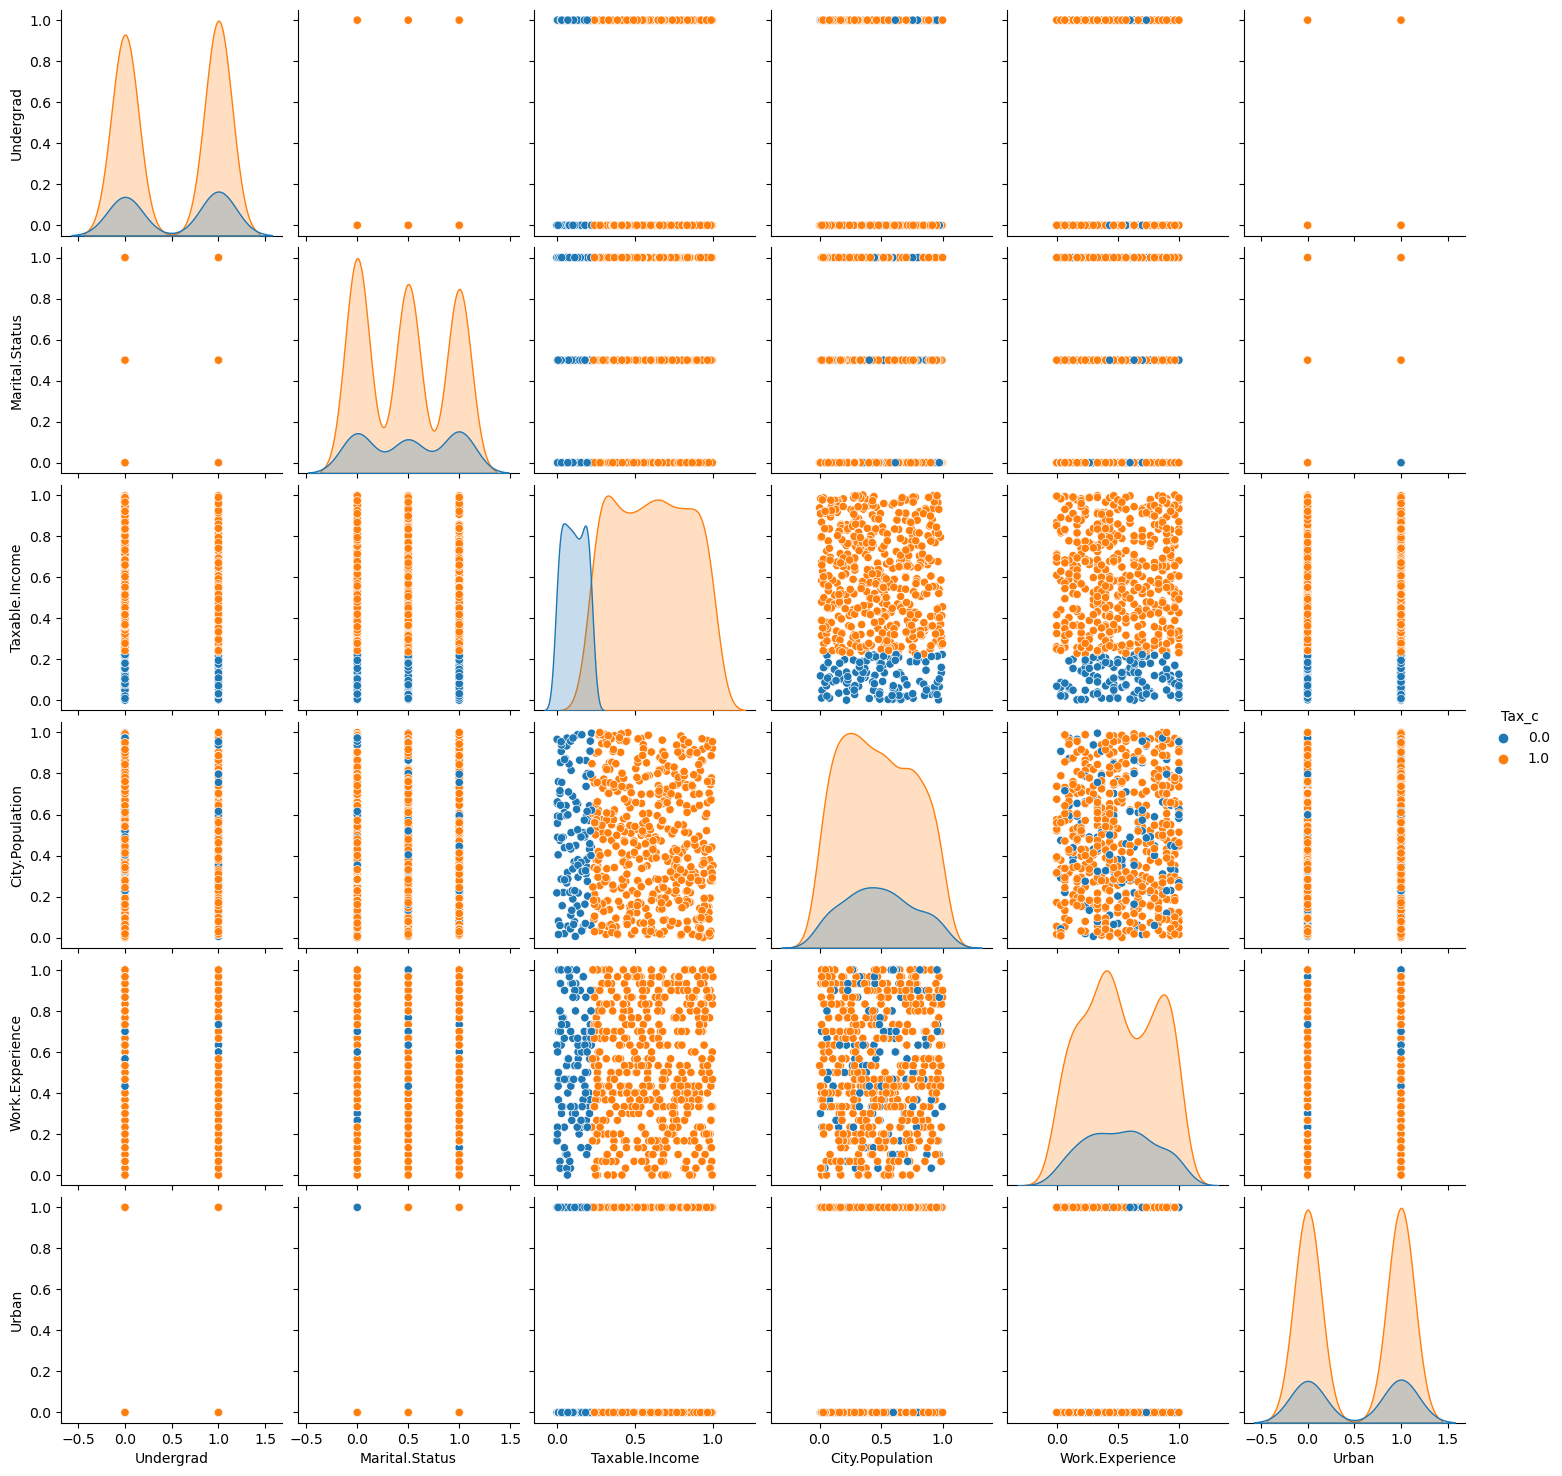

In [32]:
sns.pairplot(df1, hue = 'Tax_c')

# Splitting data into separate training and test set

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.33, random_state =42)

In [34]:
X_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
274,1.0,1.000000,0.498882,0.833333,0.0
850,1.0,1.000000,0.324673,0.243796,0.0
69,1.0,0.000000,0.351249,0.966667,0.0
291,1.0,0.000000,0.210898,0.866667,1.0
131,1.0,0.000000,0.853695,0.533333,1.0
...,...,...,...,...,...
106,1.0,0.000000,0.188254,0.666667,1.0
270,0.0,1.000000,0.602883,0.166667,0.0
860,0.0,0.579548,0.756347,0.994697,0.0
435,0.0,0.500000,0.494227,0.133333,1.0


In [35]:
y_train

274    1.0
850    0.0
69     1.0
291    1.0
131    1.0
      ... 
106    0.0
270    1.0
860    0.0
435    1.0
102    1.0
Name: Tax_c, Length: 637, dtype: float64

In [36]:
X_train.shape

(637, 5)

In [37]:
X_test.shape

(315, 5)

# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(criterion='gini',
                            max_depth=8,
                            min_samples_split=10,
                            random_state=42)

In [39]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=42)

In [40]:
clf.feature_importances_

array([0.0345966 , 0.10908596, 0.38491509, 0.43087313, 0.04052923])

In [41]:
X.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban'],
      dtype='object')

In [42]:
y_pred = clf.predict(X_test)

In [43]:
y_pred

array([1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 1.

In [44]:
pd.DataFrame({'Actual':y_test,
             'Predicted':y_pred})

,Actual,Predicted
199,0.0,1.0
420,1.0,1.0
694,0.0,1.0
750,0.0,0.0
507,1.0,0.0
...,...,...
943,0.0,0.0
857,0.0,1.0
90,1.0,1.0
892,0.0,1.0


# Confusion Matrix

In [45]:
confusion_matrix(y_test,y_pred)

array([[110,  43],
       [ 57, 105]], dtype=int64)

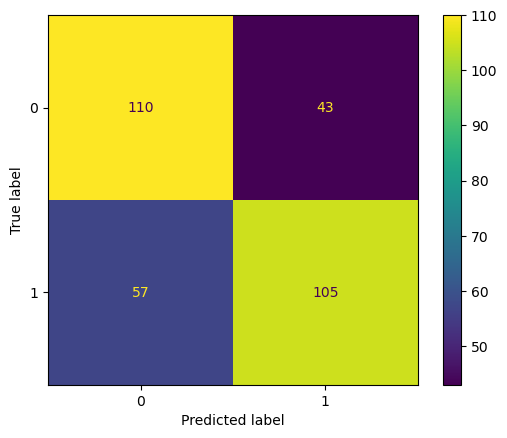

In [46]:
confusionmatrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusionmatrix)
cm_display.plot()
plt.show() 

# Classification Report

In [47]:
cn = ['Risky','Good'] 
print(classification_report(y_test, y_pred, target_names=cn))

              precision    recall  f1-score   support

       Risky       0.66      0.72      0.69       153
        Good       0.71      0.65      0.68       162

    accuracy                           0.68       315
   macro avg       0.68      0.68      0.68       315
weighted avg       0.68      0.68      0.68       315



# Accuracy Score

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6825396825396826

# Cross validation score

In [49]:
seed = 7
kfold = KFold(n_splits=10)

In [50]:
model = DecisionTreeClassifier()

In [51]:
results = cross_val_score(model, X, Y, cv = kfold)
results

array([0.54166667, 0.66666667, 0.68421053, 0.52631579, 0.66315789,
       0.64210526, 0.73684211, 0.65263158, 0.8       , 0.71578947])

In [52]:
results.mean()

0.6629385964912281

# Feature Importance Plot

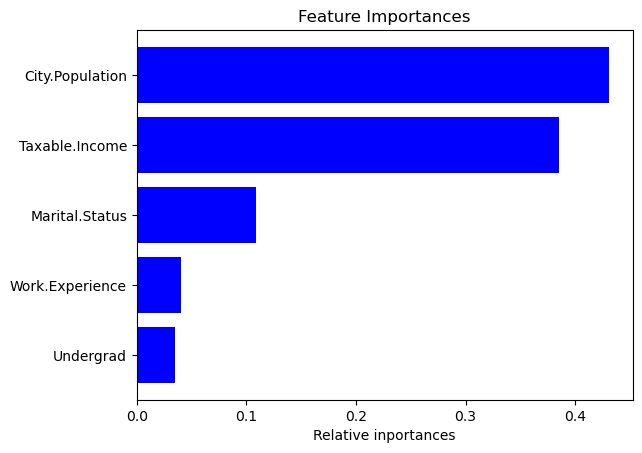

In [53]:
features = df1.columns
importances = clf.feature_importances_
indicies = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indicies)), importances[indicies], color = 'b', align='center')
plt.yticks(range(len(indicies)), [features[i] for i in indicies])
plt.xlabel('Relative inportances')
plt.show()